<a href="https://colab.research.google.com/github/evaaaaho1999/Text-Mining/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The integrated financial news and information chat bot system.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from collections import Counter #計數器

def cm_plot(original_label, predict_label, pic=None):
    cm = confusion_matrix(original_label, predict_label)   # 由原标签和预测标签生成混淆矩阵
    plt.figure()
    
    # plt.imshow(cm,cmap=plt.cm.get_cmap('gray', 1))
    plt.matshow(cm, cmap=plt.cm.Blues)     # 画混淆矩阵，配色风格使用cm.Blues
    plt.colorbar()    # 颜色标签
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[y, x], xy=(x, y), horizontalalignment='center', verticalalignment='center')
            # annotate主要在图形中添加注释
            # 第一个参数添加注释
            # 第二个参数是注释的内容
            # xy设置箭头尖的坐标
            # horizontalalignment水平对齐
            # verticalalignment垂直对齐
            # 其余常用参数如下：
            # xytext设置注释内容显示的起始位置
            # arrowprops 用来设置箭头
            # facecolor 设置箭头的颜色
            # headlength 箭头的头的长度
            # headwidth 箭头的宽度
            # width 箭身的宽度
    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    plt.title('confusion matrix')
    if pic is not None:
        plt.savefig(str(pic) + '.jpg')
    plt.show()

In [ ]:
from keras.utils import np_utils # 轉onehot
# DNN by keras
import keras.models 
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import Adam
from sklearn import preprocessing
from keras.layers import Dropout

# 建立Sequential模型
def build_model(in_layer=1000,hid_layer=500,out_layer=2):
    model = Sequential()
    model.add(Dense(input_dim=in_layer,units=hid_layer))
    model.add(Activation('relu'))
    model.add(Dense(units=out_layer))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    return model
# 建立Sequential模型
def build_model2(in_layer=1000,hid_layer1=500,hid_layer2=250,out_layer=2):
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(in_layer,)))
    model.add(Dense(input_dim=in_layer,units=hid_layer1))
    model.add(Activation('relu'))
    model.add(Dropout(0.2, input_shape=(hid_layer2,)))
    model.add(Activation('relu'))
    model.add(Dense(units=out_layer))
    model.add(Activation('sigmoid'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    return model
# 訓練繪圖工具
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

Using TensorFlow backend.


In [ ]:
#Mount google drive to google colab virtual machine
from google.colab import drive
drive.mount('/content/drive')
mydrive ="/content/drive/My Drive/Colab Notebooks/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#download data from google drive
import gdown
url = "https://drive.google.com/u/0/uc?id=1d9oi4VNG_j5GvZJNygkvBih_Hc8vx2A_&export=download"
gdown.download(url, mydrive+"Financial_News.csv", quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1d9oi4VNG_j5GvZJNygkvBih_Hc8vx2A_&export=download
To: /content/drive/My Drive/Colab Notebooks/Financial_News.csv
100%|██████████| 672k/672k [00:00<00:00, 45.5MB/s]
[Errno 5] Input/output error: '/content/drive/My Drive/Colab Notebooks/Financial_News.csv'


In [ ]:
#load dataset into pandas dataframe
import pandas as pd
from collections import Counter
df = pd.read_csv(mydrive+"Financial_News.csv",delimiter=',',header = None, encoding ='latin')
df.columns=['label', 'text'] # name the column of dataframe 
print(Counter(df.label))
df["label"] =  df["label"].map({"neutral":0, "negative":-1, "positive":1})
df

In [ ]:
df['text'][2]

## max_features 500000

In [ ]:
MAX_FEATURES = 500000

### Without POS

**Split Training - Testing data for validation**

In [ ]:
from sklearn import model_selection

# split the dataset into training and testing 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['text'], 
                                                      df['label'],test_size=0.1,random_state=1)

#test_size = 0.1 mean 90% data is used for traning data, 10% for testing data.


from sklearn import preprocessing
# encode the target variable, label Negative/Positive -> 0/1
encoder = preprocessing.LabelEncoder()
train_y_en = encoder.fit_transform(train_y)
valid_y_en = encoder.fit_transform(valid_y)

from sklearn.feature_extraction.text import TfidfVectorizer
# word level tf-idf
tfidf_vect = TfidfVectorizer(stop_words='english',  max_features = MAX_FEATURES)
tfidf_vect.fit(train_x) #Learn vocabulary and idf from training data set. (in bad words)
xtrain_tfidf =  tfidf_vect.transform(train_x) # compute tfidf for tranning data set
xvalid_tfidf =  tfidf_vect.transform(valid_x) # compute tfidf for testing data set

In [ ]:
dump(tfidf_vect, mydrive + 'tfidf_vect.pk') 

In [ ]:
load( mydrive + 'tfidf_vect.pk')

In [ ]:
train_y

In [ ]:
train_y_en

In [ ]:
print(Counter(train_y))
print(Counter(train_y_en))

In [ ]:
from sklearn import tree,  metrics
classifier_tree = tree.DecisionTreeClassifier(random_state=1)
# fit the training dataset on the classifier
classifier_tree =classifier_tree.fit(xtrain_tfidf, train_y_en)

# predict the labels on validation dataset
valid_y_pred_tree = classifier_tree.predict(xvalid_tfidf)
accuracy_tree = metrics.accuracy_score(valid_y_en, valid_y_pred_tree)
confusion_matrix_tree = metrics.confusion_matrix(valid_y_en, valid_y_pred_tree, labels=[0,1,2])
print ("Accuracy", accuracy_tree)
F1_score1=metrics.f1_score(valid_y_en, valid_y_pred_tree, average='macro')
print ("F-score", F1_score1)
print ("confusion_matrix\n", confusion_matrix_tree)
cm_plot(valid_y_en,valid_y_pred_tree)

In [ ]:
from joblib import dump, load
dump(classifier_tree, mydrive + 'news_mood.joblib') 

In [ ]:
clf = load(mydrive + 'news_mood.joblib')

In [ ]:
clf

**Use RandomForestClassifier- Full code**

In [ ]:
from sklearn import ensemble
classifier_rf = ensemble.RandomForestClassifier(random_state= 1)
# fit the training dataset on the classifier
classifier_rf.fit(xtrain_tfidf, train_y_en)

# predict the labels on validation dataset
valid_y_pred_rf = classifier_rf.predict(xvalid_tfidf)

accuracy_rf = metrics.accuracy_score(valid_y_en, valid_y_pred_rf)
confusion_matrix_rf = metrics.confusion_matrix(valid_y_en, valid_y_pred_rf, labels=[0,1])
F1_score=metrics.f1_score(valid_y_en, valid_y_pred_rf)
print ("Accuracy", accuracy_rf)
print ("F-score", F1_score)
print ("confusion_matrix\n", confusion_matrix_rf)
cm_plot(valid_y_en, valid_y_pred_rf)

**Use Neural Network- Multi-layer Perceptron classifier.**

In [ ]:
from sklearn.neural_network import MLPClassifier
import time
start = time.clock()
classifier_nn = MLPClassifier(random_state=1)
# fit the training dataset on the classifier
classifier_nn.fit(xtrain_tfidf, train_y_en) # take around 3-4 minutes

# predict the labels on validation dataset
valid_y_pred_nn = classifier_nn.predict(xvalid_tfidf)

accuracy_nn = metrics.accuracy_score(valid_y_en, valid_y_pred_nn)
confusion_matrix_nn = metrics.confusion_matrix(valid_y_en, valid_y_pred_nn, labels=[0,1])
print ("Accuracy", accuracy_nn)
F1_score=metrics.f1_score(valid_y_en, valid_y_pred_nn)
print ("F-score", F1_score)
print ("confusion_matrix\n", confusion_matrix_nn)
cm_plot(valid_y_en, valid_y_pred_nn)
end = time.clock()
print (end-start)

In [ ]:
from sklearn.neural_network import MLPClassifier
import time
start = time.clock()

classifier_nn = MLPClassifier(hidden_layer_sizes=(500, 2),activation='logistic')
# fit the training dataset on the classifier
classifier_nn.fit(xtrain_tfidf, train_y_en) # take around 3-4 minutes

# predict the labels on validation dataset
valid_y_pred_nn = classifier_nn.predict(xvalid_tfidf)

accuracy_nn = metrics.accuracy_score(valid_y_en, valid_y_pred_nn)
confusion_matrix_nn = metrics.confusion_matrix(valid_y_en, valid_y_pred_nn, labels=[0,1])
print ("Accuracy", accuracy_nn)
F1_score=metrics.f1_score(valid_y_en, valid_y_pred_nn)
print ("F-score", F1_score)
print ("confusion_matrix\n", confusion_matrix_nn)
cm_plot(valid_y_en, valid_y_pred_nn)
end = time.clock()
print (end-start)

In [ ]:
# XGBoost
from xgboost import XGBClassifier # XGB 分類器
from xgboost import plot_importance # XGB特徵重要性

xgbc = XGBClassifier(max_depth=5)
# fit the training dataset on the classifier
xgbc.fit(xtrain_tfidf,train_y_en)
# predict the labels on validation dataset
valid_y_pred_xgbc = xgbc.predict(xvalid_tfidf)

accuracy_xgb = metrics.accuracy_score(valid_y_en, valid_y_pred_xgbc)
confusion_matrix_xgb = metrics.confusion_matrix(valid_y_en, valid_y_pred_xgbc, labels=[0,1])
print ("Accuracy", accuracy_xgb)
F1_score=metrics.f1_score(valid_y_en, valid_y_pred_xgbc)
print ("confusion_matrix\n", confusion_matrix_xgb)
cm_plot(valid_y_en, valid_y_pred_xgbc)

In [ ]:
plot_importance(xgbc,max_num_features = 20)
plt.show()

In [ ]:
# User DNN
dnn = build_model2(in_layer=29640,hid_layer1=500,hid_layer2=500)
X_train,Y_train,X_test,Y_test = xtrain_tfidf,train_y_en,xvalid_tfidf,valid_y_en
Y_train_array = np.array(Y_train)
Y_train_onehot = np_utils.to_categorical(Y_train_array)
Y_test_array = np.array(Y_test)
Y_test_onehot = np_utils.to_categorical(Y_test_array)

train_history = dnn.fit(
    x=X_train,
    y=Y_train_onehot,
    validation_split=0.2,
    epochs=5,batch_size=500,verbose=2)

valid_y_pred_DNN = dnn.predict_classes(xvalid_tfidf)
accuracy_DNN = metrics.accuracy_score(valid_y_en, valid_y_pred_DNN)
confusion_matrix_DNN = metrics.confusion_matrix(valid_y_en, valid_y_pred_DNN, labels=[0,1])
print ("Accuracy", accuracy_DNN)
F1_score=metrics.f1_score(valid_y_en, valid_y_pred_DNN)
print ("F-score", F1_score)
print ("confusion_matrix\n", confusion_matrix_DNN)
cm_plot(valid_y_en, valid_y_pred_DNN)

## WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,ImageColorGenerator
import string
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
import nltk
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# for preprocessing
punctuation = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
re_punctuation = "[{}]".format(punctuation) # for regex
stopword_set = set(stopwords.words('english'))
for word in ["tea","ice","fuze"]:
    stopword_set.add(word)
wnl = WordNetLemmatizer()
filter_tags = set(["JJ","JJR","JJS",
                  "NN","NNS","NNP","NNPS","PRP","PRP$",])

In [ ]:
data = []
for text in df.text.values:
    # remove punctuation
    text_removed_punctuation = re.sub(re_punctuation,"",text)
    # normalize
    text_normalized = text_removed_punctuation.lower()
    # tokenize
    token = nltk.word_tokenize(text_normalized)
    # Lemmatization
    token_lem = [wnl.lemmatize(word,"v") for word in token]
    token_lem = [wnl.lemmatize(word,"a") for word in token_lem]
    token_lem = [wnl.lemmatize(word,"n") for word in token_lem]
    # remove stop words
    filtered_tokens = [word for word in token_lem if not word in stopword_set]
    # POS
    pos_tags =nltk.pos_tag(filtered_tokens)
    pos_tags_selected = list(filter(lambda x: x[1] in filter_tags,  pos_tags))
    POSed_data = []
    for word in pos_tags_selected:
        POSed_data.append(word[0])
    data += POSed_data

In [ ]:
text_removed_punctuation

'Sales in Finland decreased by 105  in January  while sales outside Finland dropped by 17  '

In [ ]:
data[:10]

['accord',
 'company',
 'plan',
 'production',
 'russia',
 'company',
 'grow',
 'technopolis',
 'plan',
 'stag']

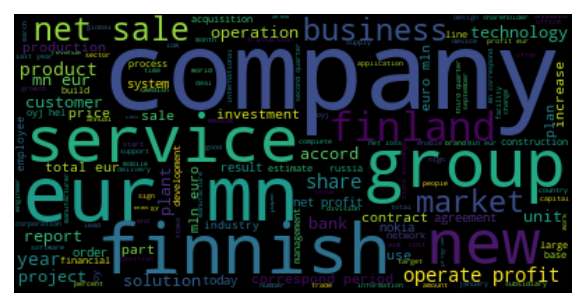

In [ ]:
wc = WordCloud(
            max_words = 300,
            background_color="black",
            
            random_state = 1
              ).generate(" ".join(data))

plt.figure(figsize=(5, 5),dpi = 144)
plt.imshow(wc.recolor(random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.savefig('WordCloud.png', dpi=144)
plt.show()

## 預測

### 單篇測試

In [ ]:
map_dict = {1:"neutral", 2:"postive", 0:"negative"}

In [ ]:
test_text = "The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."

In [ ]:
test_tfidf = tfidf_vect.transform([test_text])

In [ ]:
predict_en = classifier_tree.predict(test_tfidf)

In [ ]:
for item in predict_en:
    print(map_dict[item])

negative


### 多篇測試

### 當天新聞測試

In [ ]:
#download data from google drive
import gdown
url = "https://drive.google.com/u/0/uc?id=1-24aWX9oqnhYm65onxV5Zm4PbXppvtGD&export=download"
gdown.download(url, mydrive+"news_en.csv", quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1-24aWX9oqnhYm65onxV5Zm4PbXppvtGD&export=download
To: /content/drive/My Drive/Colab Notebooks/news_en.csv
100%|██████████| 6.07k/6.07k [00:00<00:00, 3.44MB/s]


'/content/drive/My Drive/Colab Notebooks/news_en.csv'

In [ ]:
df_testNews = pd.read_csv(mydrive+"news_en.csv")
df_testNews

,news
0,Coronavirus sinks U.S. consumer spending; savi...
1,Google postpones Android 11 unveiling amid U.S...
2,3 Ways to Invest in the Acceleration of E-Comm...
3,Bat-wielding Minneapolis residents warn protes...
4,Several Target stores temporarily closing in t...
...,...
65,This Photo Fooled Some Corvette Fans Into Thin...
66,"Aphria, Aurora And Other Big Ag Cannabis Compa..."
67,Uber to offer hourly rides in select US cities...
68,"Looters break into Sacramento stores, grab mer..."


In [ ]:
df_testNews["predict"] = None
for index,row in df_testNews.iterrows():
    row_tfidf = tfidf_vect.transform([row["news"]])
    row_predict_en = classifier_tree.predict(row_tfidf)
    df_testNews.iloc[index]["predict"] = map_dict[row_predict_en[0]]

In [ ]:
df_testNews

,news,tfidf,predict
0,Coronavirus sinks U.S. consumer spending; savi...,"(0, 7908)\t0.5061872077665013\n (0, 7428)\t...",postive
1,Google postpones Android 11 unveiling amid U.S...,"(0, 3887)\t0.574226517280324\n (0, 1646)\t0...",neutral
2,3 Ways to Invest in the Acceleration of E-Comm...,"(0, 9111)\t0.633143838650552\n (0, 4525)\t0...",negative
3,Bat-wielding Minneapolis residents warn protes...,"(0, 7991)\t0.5497532359138645\n (0, 7113)\t...",neutral
4,Several Target stores temporarily closing in t...,"(0, 8691)\t0.38524798670771615\n (0, 8391)\...",neutral
...,...,...,...
65,This Photo Fooled Some Corvette Fans Into Thin...,"(0, 6355)\t1.0",neutral
66,"Aphria, Aurora And Other Big Ag Cannabis Compa...","(0, 2070)\t0.4115135873143026\n (0, 1425)\t...",postive
67,Uber to offer hourly rides in select US cities...,"(0, 7548)\t0.5012157035752653\n (0, 6451)\t...",postive
68,"Looters break into Sacramento stores, grab mer...","(0, 8031)\t0.3653530527242991\n (0, 5447)\t...",neutral


In [ ]:
Counter(df_testNews.predict)

Counter({'negative': 10, 'neutral': 47, 'postive': 13})

In [ ]:
df_testNews.to_csv(mydrive+"news_en_predict.csv")

## Convert text into vector

### word2vec

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec, KeyedVectors, TfidfModel
from gensim.parsing.preprocessing import STOPWORDS
from scipy.sparse.linalg import svds
from scipy.spatial.distance import cosine
import numpy as np

In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # 顯示所有output
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tmp = df["text"][0]

In [ ]:
word_tokenize(tmp)

['According',
 'to',
 'Gran',
 ',',
 'the',
 'company',
 'has',
 'no',
 'plans',
 'to',
 'move',
 'all',
 'production',
 'to',
 'Russia',
 ',',
 'although',
 'that',
 'is',
 'where',
 'the',
 'company',
 'is',
 'growing',
 '.']

In [ ]:
tmp = df["text"].values[0]

In [ ]:
# 加载数据
documents = []
# 使用count当做每个句子的“标签”，标签和每个句子是一一对应的
count = 0
with open('../data/titles/ko.video.corpus','r') as f:
    for line in f:
        title = unicode(line, 'utf-8')
        # 切词，返回的结果是列表类型
        words = ko_title2words(title)
        # 这里documents里的每个元素是二元组，具体可以查看函数文档
        documents.append(gensim.models.doc2vec.TaggedDocument(words, [str(count)]))
        count += 1
        if count % 10000 == 0:
            logging.info('{} has loaded...'.format(count))

# 模型训练
model = Doc2Vec(documents, dm=1, size=100, window=8, min_count=5, workers=4)

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=10, window=2, min_count=1, workers=4)

In [ ]:
model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [ ]:
vector = model.infer_vector(["system", "response","text"])

In [ ]:
vector

array([ 0.0276609 , -0.02960406, -0.00129706, -0.03472012, -0.04417922,
        0.02941553, -0.03414635,  0.0135943 ,  0.03214708,  0.01177721],
      dtype=float32)

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
TaggedDocument(["system", "response","text"],0)

TaggedDocument(words=['system', 'response', 'text'], tags=0)

### Doc2Vec

In [ ]:
!pip install gensim

In [ ]:
import gensim
import jieba
import pandas as pd
from gensim.models.doc2vec import Doc2Vec

In [ ]:
text_list = list(df.text)
TaggededDocument = gensim.models.doc2vec.TaggedDocument

In [ ]:
d2v_train = []
for i,text in enumerate(text_list):
    # remove punctuation
    text_removed_punctuation = re.sub(re_punctuation,"",text)
    # normalize
    text_normalized = text_removed_punctuation.lower()
    # tokenize
    token = nltk.word_tokenize(text_normalized)
    # Lemmatization
    token_lem = [wnl.lemmatize(word,"v") for word in token]
    token_lem = [wnl.lemmatize(word,"a") for word in token_lem]
    token_lem = [wnl.lemmatize(word,"n") for word in token_lem]
    # remove stop words
    filtered_tokens = [word for word in token_lem if not word in stopword_set]
    # tag the index for Document
    document = TaggededDocument(filtered_tokens,tags=[i])
    d2v_train.append(document)

In [ ]:
def d2v_model(x_train, size = 500):
    model = Doc2Vec(x_train,min_count=1,window=3,size=size,nagative=5,worker=4)
    model.train(x_train,total_examples=model.corpus_count,epochs=10)
    return model

In [ ]:
for i in range(500):
    df["vec"+str(i)] = None

In [ ]:
for i,row in df.iterrows():
    text = row["text"]
    # remove punctuation
    text_removed_punctuation = re.sub(re_punctuation,"",text)
    # normalize
    text_normalized = text_removed_punctuation.lower()
    # tokenize
    token = nltk.word_tokenize(text_normalized)
    # Lemmatization
    token_lem = [wnl.lemmatize(word,"v") for word in token]
    token_lem = [wnl.lemmatize(word,"a") for word in token_lem]
    token_lem = [wnl.lemmatize(word,"n") for word in token_lem]
    # remove stop words
    filtered_tokens = [word for word in token_lem if not word in stopword_set]
    # convert text to vector
    vector = d2v_model.infer_vector(doc_words=filtered_tokens,alpha=0.025,steps=500)

    # append new col
    for j in range(500):
        df.iloc[i,2+j] = float(vector[j])
    
    print("converting %d" % i)

converting 0
converting 1
converting 2
converting 3
converting 4
converting 5
converting 6
converting 7
converting 8
converting 9
converting 10
converting 11
converting 12
converting 13
converting 14
converting 15
converting 16
converting 17
converting 18
converting 19
converting 20
converting 21
converting 22
converting 23
converting 24
converting 25
converting 26
converting 27
converting 28
converting 29
converting 30
converting 31
converting 32
converting 33
converting 34
converting 35
converting 36
converting 37
converting 38
converting 39
converting 40
converting 41
converting 42
converting 43
converting 44
converting 45
converting 46
converting 47
converting 48
converting 49
converting 50
converting 51
converting 52
converting 53
converting 54
converting 55
converting 56
converting 57
converting 58
converting 59
converting 60
converting 61
converting 62
converting 63
converting 64
converting 65
converting 66
converting 67
converting 68
converting 69
converting 70
converting 71
co

In [ ]:
df.to_csv(mydrive+"Financial_News_with_doc2vec(500).csv", index = False)

In [ ]:
df

,label,text,vec0,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,vec11,vec12,vec13,vec14,vec15,vec16,vec17,vec18,vec19,vec20,vec21,vec22,vec23,vec24,vec25,vec26,vec27,vec28,vec29,vec30,vec31,vec32,vec33,vec34,vec35,vec36,vec37,...,vec460,vec461,vec462,vec463,vec464,vec465,vec466,vec467,vec468,vec469,vec470,vec471,vec472,vec473,vec474,vec475,vec476,vec477,vec478,vec479,vec480,vec481,vec482,vec483,vec484,vec485,vec486,vec487,vec488,vec489,vec490,vec491,vec492,vec493,vec494,vec495,vec496,vec497,vec498,vec499
0,0,"According to Gran , the company has no plans t...",-0.0526841,0.0162532,-0.00989335,0.104146,0.0290829,0.0472501,-0.0320721,-0.0475168,-0.0304924,-0.0445282,-0.164552,0.149834,-0.325047,-0.013397,0.0588878,-0.0965825,-0.164083,-0.0322852,0.126677,0.0164907,0.0210774,-0.0211427,-0.356911,-0.0764644,0.119515,-0.269789,0.0394052,-0.0967929,0.107939,-0.191342,0.10387,0.153362,-0.365151,0.0124427,0.0918534,-0.0927316,0.0449667,0.152339,...,-0.049671,-0.00823133,0.0680098,0.0577634,0.306669,0.116654,0.17716,0.0675815,-0.256287,0.0870642,-0.179587,0.0591718,0.150014,-0.13191,0.182074,-0.128618,0.0730174,-0.0947257,0.144823,-0.185004,0.0899978,-0.0521617,-0.0797927,0.10943,0.0733768,0.156162,-0.0667669,-0.0526364,-0.15038,0.0743193,0.00436299,-0.0285171,-0.0372898,0.0549794,0.092312,-0.114401,-0.029845,-0.045974,None,None
1,0,Technopolis plans to develop in stages an area...,-0.0803834,-0.0841339,-0.181596,0.11443,-0.0307113,-0.0505421,-0.0254253,-0.0367971,-0.243459,0.0533704,-0.188669,0.114049,-0.329227,-0.0553676,-0.0776065,-0.281467,0.00643519,-0.264525,0.0446153,-0.0665408,0.13362,-0.0182451,-0.400997,-0.0530558,0.141008,-0.323534,-0.0351667,-0.1203,0.210461,-0.260259,0.158988,0.221269,-0.526976,0.00483858,0.245971,0.0571855,0.272856,0.25656,...,0.0362728,-0.16904,0.143831,0.158139,0.371632,0.317503,0.20745,0.0427205,-0.382771,0.19148,-0.357761,0.269872,0.207887,-0.139183,0.21285,-0.125799,0.0328474,-0.0884626,0.323423,-0.0780105,0.197723,-0.22353,-0.238397,0.246341,0.132616,0.252153,-0.0217215,0.0436468,-0.168212,0.206622,0.147824,-0.177025,-0.072868,-0.059033,0.115348,0.0151053,0.17303,0.0576134,None,None
2,-1,The international electronic industry company ...,-0.117889,0.0134635,-0.267481,0.0818942,0.103944,-0.184598,-0.0805731,-0.0224624,-0.175108,0.046972,-0.145231,0.121013,-0.140009,-0.0308801,-0.00262397,-0.1117,0.0851944,-0.0425785,-0.00755151,0.0524275,0.0768564,-0.0307846,-0.0956775,-0.0222079,-0.0698348,-0.101261,0.0535317,-0.0637017,0.0807182,-0.121703,0.119718,0.0597025,-0.243799,0.0102601,0.0598944,-0.0100801,0.0927077,0.0566351,...,-0.0460964,-0.115134,0.041892,0.113105,0.160954,0.0515026,0.0489254,0.0421534,-0.231517,0.0490277,-0.186865,0.0519068,0.127579,-0.0206089,0.0371048,-0.110942,0.205995,-0.176236,0.124924,-0.0192442,0.259056,0.0268954,-0.187446,0.105404,0.170809,0.198352,-0.0535108,0.223566,-0.197381,-0.0839655,0.222544,-0.166281,-0.0530168,0.0564092,-0.0157717,0.0204636,0.130618,-0.00394724,None,None
3,1,With the new production plant the company woul...,0.132105,0.196131,0.198248,0.125928,0.263673,0.205097,-0.00580945,-0.00830266,0.0507265,-0.226629,-0.00163858,0.0380543,-0.60543,0.257221,0.197524,0.0702038,-0.620942,0.01648,0.487386,0.317474,-0.261974,-0.0884132,-0.451261,-0.493146,0.234322,-0.442123,-0.00648712,-0.0771527,-0.135064,-0.19179,-0.106125,0.0765589,-0.340221,0.227903,-0.240321,-0.349339,-0.435395,-0.320651,...,-0.111535,0.385276,-0.340258,-0.198813,0.281556,-0.295963,0.460195,0.406023,-0.0828023,-0.0353102,0.359099,-0.30142,0.144066,-0.236744,0.114913,-0.137567,0.281814,-0.156278,-0.147753,-0.701296,-0.149746,0.0766724,0.281864,-0.483431,-0.00148603,-0.318086,-0.206929,-0.280877,-0.226166,-0.313838,-0.311668,0.228134,0.094948,0.0901949,-0.0639834,-0.269638,-0.473596,-0.319532,None,None
4,1,According to the company 's updated strategy f...,0.0767709,0.174208,-0.114041,0.0601869,-0.140045,-0.254105,0.00553642,-0.0019415,0.443772,-0.232032,-0.104661,0.195068,-0.435931,-0.147508,0.003080

### Train and Test

### DNN

In [ ]:
df["Result_normalize"] =  df["label"].map({0:0,1:1,-1:2})

In [ ]:
feature_vec = ["vec" + str(i) for i in range(498)]
X = df[feature_vec]
Y = df["Result_normalize"]

In [ ]:
from sklearn.model_selection import train_test_split
# split train/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
Y_train_array = np.array(Y_train)
Y_train_onehot = np_utils.to_categorical(Y_train_array)

Y_test_array = np.array(Y_test)
Y_test_onehot = np_utils.to_categorical(Y_test_array)

In [ ]:
dnn = build_model2(498,250,50,3)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_17 (Dropout)         (None, 498)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 250)               124750    
_________________________________________________________________
activation_31 (Activation)   (None, 250)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_32 (Activation)   (None, 250)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 753       
_________________________________________________________________
activation_33 (Activation)   (None, 3)               

In [ ]:
train_history = dnn.fit(
    x=X_train,
    y=Y_train_onehot,
    validation_split=0.2,
    epochs=20,batch_size=10,verbose=2)

Train on 3100 samples, validate on 776 samples
Epoch 1/20
 - 1s - loss: 0.8743 - accuracy: 0.6100 - val_loss: 0.8753 - val_accuracy: 0.5941
Epoch 2/20
 - 1s - loss: 0.8435 - accuracy: 0.6165 - val_loss: 0.8640 - val_accuracy: 0.6005
Epoch 3/20
 - 1s - loss: 0.8281 - accuracy: 0.6297 - val_loss: 0.8582 - val_accuracy: 0.6147
Epoch 4/20
 - 1s - loss: 0.8192 - accuracy: 0.6429 - val_loss: 0.8378 - val_accuracy: 0.6211
Epoch 5/20
 - 1s - loss: 0.8075 - accuracy: 0.6410 - val_loss: 0.8404 - val_accuracy: 0.6147
Epoch 6/20
 - 1s - loss: 0.7982 - accuracy: 0.6497 - val_loss: 0.8357 - val_accuracy: 0.6198
Epoch 7/20
 - 1s - loss: 0.7909 - accuracy: 0.6548 - val_loss: 0.8389 - val_accuracy: 0.6173
Epoch 8/20
 - 1s - loss: 0.7834 - accuracy: 0.6581 - val_loss: 0.8316 - val_accuracy: 0.6276
Epoch 9/20
 - 1s - loss: 0.7798 - accuracy: 0.6552 - val_loss: 0.8327 - val_accuracy: 0.6224
Epoch 10/20
 - 1s - loss: 0.7802 - accuracy: 0.6561 - val_loss: 0.8206 - val_accuracy: 0.6237
Epoch 11/20
 - 1s - lo

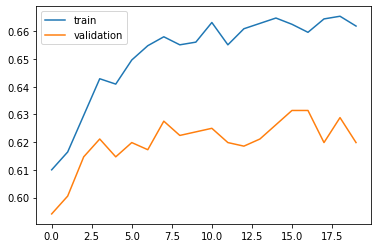

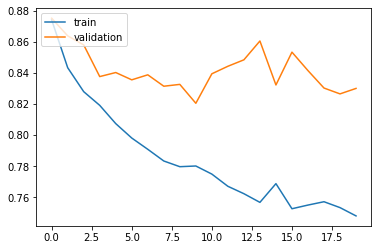

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [ ]:
# User DNN
dnn = build_model(in_layer=300,hid_layer=50,out_layer=3)
X_train,Y_train,X_test,Y_test = xtrain_tfidf,train_y_en,xvalid_tfidf,valid_y_en
Y_train_array = np.array(Y_train)
Y_train_onehot = np_utils.to_categorical(Y_train_array)
Y_test_array = np.array(Y_test)
Y_test_onehot = np_utils.to_categorical(Y_test_array)

train_history = dnn.fit(
    x=X_train,
    y=Y_train_onehot,
    validation_split=0.2,
    epochs=5,batch_size=500,verbose=2)

valid_y_pred_DNN = dnn.predict_classes(xvalid_tfidf)
accuracy_DNN = metrics.accuracy_score(valid_y_en, valid_y_pred_DNN)
confusion_matrix_DNN = metrics.confusion_matrix(valid_y_en, valid_y_pred_DNN, labels=[0,1])
print ("Accuracy", accuracy_DNN)
F1_score=metrics.f1_score(valid_y_en, valid_y_pred_DNN)
print ("F-score", F1_score)
print ("confusion_matrix\n", confusion_matrix_DNN)
cm_plot(valid_y_en, valid_y_pred_DNN)

### XGB

In [ ]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

In [ ]:
# Accuracy
print('Accuracy: %.3f' % dtc.score(X_test, Y_test))

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

In [ ]:
# Accuracy
print('Accuracy: %.3f' % rfc.score(X_test, Y_test))

In [ ]:
# confuson_matrix
Y_predict = rfc.predict(X_test)
confusion_matrix(Y_test,Y_predict)